所有的生成结果
1. /data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_llama-3_1-8B-Instruct_top_n.pkl
2. /data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_o1-llama-3_1-8B-Instruct_top_p.pkl
3. /data/zecheng/acl2025/MyRLHF/evaluation/babilong/Qwen-2-5-7b-instruct/preliminary/preds_o1-Qwen2.5-7B-Instruct-Instruct_top_n.pkl
4. /data/zecheng/acl2025/MyRLHF/evaluation/babilong/Qwen-2-5-7b-instruct/preliminary/preds_Qwen2.5-7B-Instruct-Instruct_top_n.pkl


In [19]:


import os,time
from typing import Optional, List
from openai import OpenAI

def chat(ak       : str = "ea28bf46-979c-49b9-b08a-92303bb99052", 
         url      : str = "https://ark.cn-beijing.volces.com/api/v3", 
         model    : str = "ep-20240725161435-hjkcn",
         message  : Optional[str] = None, 
         template : List  = None, 
         **kwargs
         ) -> Optional[None | str]:
    # ....

    # 1. 封装 message 到template 里面，如果用户没有提供message，用默认的template封装
    # try：、、 sleep 5 s, try 3 次失败返回None
    # 2. 输入到API(model 默认是gpt40)
    
    
    client = OpenAI(
    api_key = ak,
    base_url = url,
    )


    messages=template if message is None \
        else [{"role":"user","content":message}]

    while True:
        error_times=0
        try:
            response = client.chat.completions.create(
                model=model,
                messages=messages,
                **kwargs
            )
            return response.choices[0].message.content
        except Exception as e:
            if error_times==3:break
            print(f"发生错误: {str(e)}")
            print("5秒后重试...")
            time.sleep(5)
            error_times+=1

    print("询问失败! 返回 None")

In [ ]:
chat(template=[
        {"role": "system", "content": "你是豆包，是由字节跳动开发的 AI 人工智能助手"},
        {"role": "user", "content": "常见的动物物有哪些？"},
        {"role": "assistant", "content": "猫"},
        {"role": "user", "content": "常见的十字花科植物有哪些？"},
    ],max_tokens=5)

'常见的十字花科'

In [ ]:

client = OpenAI(
    api_key = "ea28bf46-979c-49b9-b08a-92303bb99052",
    base_url = "https://ark.cn-beijing.volces.com/api/v3",
)

# Non-streaming:
print("----- standard request -----")
completion = client.chat.completions.create(
    model = "ep-20240725161435-hjkcn",  # your model endpoint ID
    messages = [
        {"role": "system", "content": "你是豆包，是由字节跳动开发的 AI 人工智能助手"},
        {"role": "user", "content": "常见的十字花科植物有哪些？"},
    ],
)
print(completion.choices[0].message.content)

# Streaming:
print("----- streaming request -----")
stream = client.chat.completions.create(
    model = "ep-20240725161435-hjkcn",  # your model endpoint ID
    messages = [
        {"role": "system", "content": "你是豆包，是由字节跳动开发的 AI 人工智能助手"},
        
        {"role": "user", "content": "常见的十字花科植物有哪些？"},
        
    ],
    # stream=True
)

# for chunk in stream:
#     if not chunk.choices:
#         continue
#     print(chunk.choices[0].delta.content, end="")
# print()

----- standard request -----
常见的十字花科植物有很多，以下是一些例子：
1. **白菜**：包括大白菜、小白菜等。
2. **萝卜**：如白萝卜、红萝卜等。
3. **甘蓝**：如卷心菜、紫甘蓝等。
4. **芥菜**：有多个品种。
5. **西兰花**：营养丰富。
6. **花椰菜**（菜花）。
7. **油菜**。
----- streaming request -----


In [ ]:
stream.choices[0].message.content

IndexError: list index out of range

In [1]:
data_paths=[
    "/data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_llama-3_1-8B-Instruct_top_n.pkl",
    "/data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_o1-llama-3_1-8B-Instruct_top_p.pkl",
    "/data/zecheng/acl2025/MyRLHF/evaluation/babilong/Qwen-2-5-7b-instruct/preliminary/preds_o1-Qwen2.5-7B-Instruct-Instruct_top_n.pkl",
    "/data/zecheng/acl2025/MyRLHF/evaluation/babilong/Qwen-2-5-7b-instruct/preliminary/preds_Qwen2.5-7B-Instruct-Instruct_top_n.pkl"
]

In [2]:
from modelzipper.tutils import *
from pprint import pprint

ModelZipper is ready for launch🚀 | Current Version🦄 >>> 0.2.7 <<< | AOE Time🕒 2024-12-07 01:15:25


In [3]:
# 启动评测模型：
client = init_doubao_api()

testing_case = call_with_messages(client, model_name="doubao-pro-4k", system_message="You are a helpful assistant.", user_query="Hi, who are you?")
print(testing_case)

{'status': 'success', 'response': "Hello! I'm an AI here to assist you. You can call me whatever you like. How can I help you today?", 'input': [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Hi, who are you?'}]}


In [4]:

# top_n setting
content = auto_read_data("/data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_llama-3_1-8B-Instruct_top_n.pkl")
pprint(content[1])
## zecheng note: top_n setting -> 对于一条query，模型提供的top_n个答案，排在前面的答案生成概率越大。评测的时候，只要有一个答案在top_n里面，就算对了。
## 这里可以同时用自动指标，也可以用模型评测。用模型评测的时候，如果和答案一致就是1，否则就是0

begin to read data from /data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_llama-3_1-8B-Instruct_top_n.pkl | file size: 13.21 MB | file type: pkl
{'all_facts': ['John went back to the hallway.',
               'John went to the garden.',
               'John grabbed the apple.',
               'John discarded the apple.',
               'Daniel journeyed to the kitchen.',
               'Mary journeyed to the garden.',
               'Daniel journeyed to the bedroom.',
               'Mary journeyed to the office.',
               'Sandra moved to the office.',
               'Daniel moved to the bathroom.',
               'Mary travelled to the garden.',
               'Daniel went back to the garden.',
               'Mary went back to the kitchen.',
               'John dropped the apple there.',
               'John moved to the bathroom.',
               'Mary journeyed to the garden.',
               'John picked up the apple.',
             

In [5]:

# o1 setting
content = auto_read_data("/data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_o1-llama-3_1-8B-Instruct_top_p.pkl")
pprint(content[0])
## zecheng note: o1 setting -> 对于一条query，模型会进行显示思考链，答案在思考链条中，这个时候需要用模型对结果进行评测。

begin to read data from /data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_o1-llama-3_1-8B-Instruct_top_p.pkl | file size: 26.28 MB | file type: pkl


{'all_facts': ['Sandra went back to the bathroom.',
               'Sandra journeyed to the kitchen.',
               'Sandra left the football.'],
 'ctx_length': '8k',
 'golden': 'bathroom',
 'pred': ['**Step 1: Identify the relevant information about Sandra and the '
          'football**\n'
          '<thinking> Sandra journeyed to the kitchen, but before that, we '
          'need to find out where she was before the kitchen, which is the '
          'location we are interested in for the football. Sandra journeyed to '
          'the kitchen, but the relevant information for the football is '
          'before the journey to the kitchen, which is Sandra journeyed to the '
          'garden, Sandra journeyed to the bedroom, Sandra journeyed to the '
          'bathroom, Sandra journeyed to the garden, Sandra journeyed to the '
          'bedroom, Sandra journeyed to the garden, Sandra journeyed to the '
          'bedroom, Sandra journeyed to the garden, Sandra journeyed to the '
 

## Babilong metrics

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
import os

import pandas as pd
import numpy as np

from source.babilong.metrics import compare_answers, TASK_LABELS

In [7]:
contents=[auto_read_data(k) for k in data_paths]

begin to read data from /data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_llama-3_1-8B-Instruct_top_n.pkl | file size: 13.21 MB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/evaluation/babilong/llama-3_1-8B-Instruct/preliminary/preds_o1-llama-3_1-8B-Instruct_top_p.pkl | file size: 26.28 MB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/evaluation/babilong/Qwen-2-5-7b-instruct/preliminary/preds_o1-Qwen2.5-7B-Instruct-Instruct_top_n.pkl | file size: 15.47 MB | file type: pkl
begin to read data from /data/zecheng/acl2025/MyRLHF/evaluation/babilong/Qwen-2-5-7b-instruct/preliminary/preds_Qwen2.5-7B-Instruct-Instruct_top_n.pkl | file size: 12.97 MB | file type: pkl


In [8]:
contents[0][0]#.keys()


{'golden': 'office',
 'task': 'qa3',
 'reference_list': [' John picked up the apple.',
  ' John moved to the office.',
  ' John travelled to the bathroom.'],
 'ctx_length': '16k',
 'question': 'Where was the apple before the bathroom? ',
 'all_facts': ['John picked up the apple.',
  'John moved to the office.',
  'John travelled to the bathroom.'],
 'pred': ['Before the bathroom the apple was in the office.',
  'Before the bathroom John was in the bedroom.',
  'Before the bathroom John was in the bedroom.',
  'Before the bathroom John travelled.',
  'Before the bathroom the apple was in the office.']}

In [9]:
j=3
set([contents[j][i]['ctx_length'] for i in range(len(contents[j]))])

{'16k', '32k', '64k', '8k'}

df

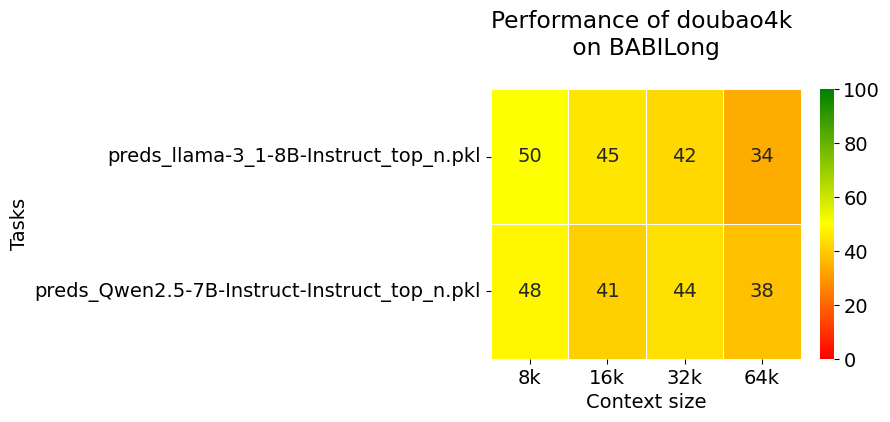

In [10]:
results_folder = './babilong_evals'
model_name = 'doubao4k'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

# import numpy as np
dfs=[contents[0],contents[3]]
tasks = [contents[0][0]['task'], contents[3][0]['task']]
ylabels=[os.path.basename(data_paths[0]),os.path.basename(data_paths[3])]
lengths = ['8k','16k','32k','64k']
accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    for i, ctx_length in enumerate(lengths):
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'


        df_list = [k for k in dfs[j] if k['ctx_length']==ctx_length]
        if len(df_list)==0:
            print(f'No such file: {fname}')
            continue
        # if df['output'].dtype != object:
        #     df['output'] = df['output'].astype(str)
        # df['output'] = df['output'].fillna('')
        dic={}
        for k in df_list[0].keys():
            lst=[]
            for t in range(len(df_list)):
                lst+=[df_list[t][k]]
            dic[k]=lst
        df=pd.DataFrame(dic)

        df['correct'] = df.apply(lambda row: max(compare_answers(row['golden'], row['pred'][idx],
                                                             row['question'], TASK_LABELS[task]
                                                             ) for idx in range(len(row['pred']))
                                                             ), axis=1)
        score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=ylabels, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

In [11]:
i=23
print(contents[1][i]['question'])
print(contents[1][i]['golden'])
print(contents[1][i]['pred'][0])

Where is the apple? 
hallway
**Step 1: Analyze the context for any direct mentions of the item 'apple' and its location.**

<thinking> I need to carefully read the context to find any direct mentions of the apple and its location. I will look for phrases like "Ruby picked up the apple," "the apple was in the garden," or "Ruby dropped the apple in the kitchen." </thinking>

Upon reading the context, I did not find any direct mentions of the apple and its location. However, I will continue to analyze the context for any indirect clues that might help me determine the location of the apple.

**Step 2: Look for any indirect clues that might indicate the location of the apple.**

<thinking> I will examine the context to see if there are any indirect clues that might suggest the location of the apple. This could include phrases like "Ruby went to the garden" or "Mary grabbed the apple there." </thinking>

Upon analyzing the context, I found that Mary grabbed the apple there, which suggests t

In [12]:
DOUBAO_TEMPLATES="""You are an AI assistant that evaluates whether the response to the question is correct according to the golden label.I'll give you a question, a response and a golden label, where the golden label is the true answer to the question. You should judge whether the response to the question is the same as the golden label. Follow these instructions:\n\n1.You can only reply `True` or `False`,where `True` means the response to the question is the same as th golden label `False` means the opposite.\n2.Reply True or False"""




import os,time
from typing import Optional, List
from openai import OpenAI

def chat(ak       : str = "ea28bf46-979c-49b9-b08a-92303bb99052", 
         url      : str = "https://ark.cn-beijing.volces.com/api/v3", 
         model    : str = "ep-20240725161435-hjkcn",
         message  : Optional[str] = None, 
         template : List  = None, 
         **kwargs
         ) -> Optional[None | str]:
    # ....

    # 1. 封装 message 到template 里面，如果用户没有提供message，用默认的template封装
    # try：、、 sleep 5 s, try 3 次失败返回None
    # 2. 输入到API(model 默认是gpt40)
    
    
    client = OpenAI(
    api_key = ak,
    base_url = url,
    )


    messages=template if message is None \
        else [{"role":"user","content":message}]

    while True:
        error_times=0
        try:
            response = client.chat.completions.create(
                model=model,
                messages=messages,
                **kwargs
            )
            return response.choices[0].message.content
        except Exception as e:
            if error_times==3:break
            print(f"发生错误: {str(e)}")
            print("5秒后重试...")
            time.sleep(5)
            error_times+=1

    print("询问失败! 返回 None")

def compare_answers_o1(target, output, question, task_labels):
    query=f"<question>{question}\n<response>{output}\n<golden>{target}"
    template=[{'role':'system','content':DOUBAO_TEMPLATES},
              {'role':'user','content':"<question>Where was Marry before afternoon?\n<response>Marry was in the bedroom.**Step 1.Marry went to the playground in the\n<golden>bedroom"},
              {'role':'assistant','content':'True'},
              {'role':'user','content':query}]


    output=chat(template=template,max_tokens=5)

    if "true" in output.lower():
        return True
    return False



Exists: ././babilong_evals/doubao4k/qa3_8k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/qa3_16k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/qa3_32k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/qa3_64k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/Qwen-qa3_8k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/Qwen-qa3_16k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/Qwen-qa3_32k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv
Exists: ././babilong_evals/doubao4k/Qwen-qa3_64k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.cs

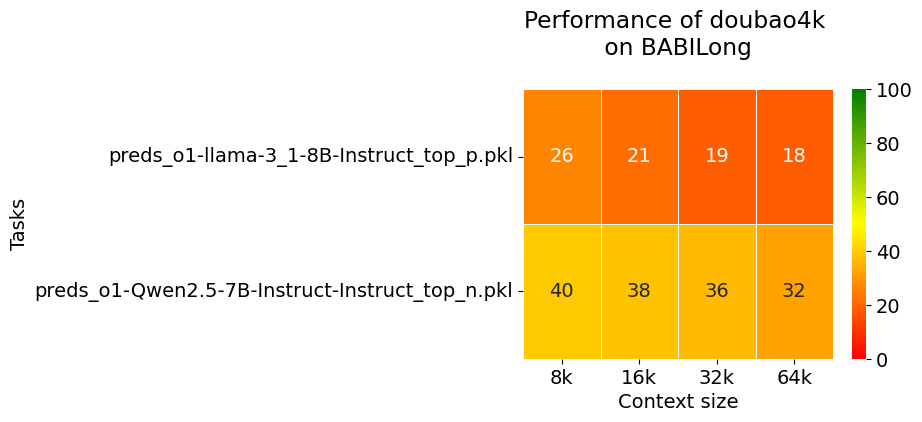

In [32]:
results_folder = './babilong_evals'
model_name = 'doubao4k'
prompt_name = 'instruction_yes_examples_yes_post_prompt_yes_chat_template_yes'

ids=[1,2]

dfs=[contents[i] for i in ids]
tasks = [contents[i][0]['task'] for i in ids]
tasks[1]='Qwen-'+ tasks[1]
ylabels=[os.path.basename(data_paths[i]) for i in ids]
lengths = ['8k','16k','32k','64k']
accuracy = np.zeros((len(tasks), len(lengths)))
for j, task in enumerate(tasks):
    for i, ctx_length in enumerate(lengths):
        ptask=task.split('-')[-1]
        if os.path.exists(f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}_doubao_eval.csv'):
            print("Exists:",f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}_doubao_eval.csv')
            
            df=pd.read_csv(f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}_doubao_eval.csv')
            score=df['correct'].sum()
            accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0
            continue
        fname = f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}.csv'


        df_list = [k for k in dfs[j] if k['ctx_length']==ctx_length]
        if len(df_list)==0:
            print(f'No such file: {fname}')
            continue
        # if df['output'].dtype != object:
        #     df['output'] = df['output'].astype(str)
        # df['output'] = df['output'].fillna('')
        dic={}
        for k in df_list[0].keys():
            lst=[]
            for t in range(len(df_list)):
                lst+=[df_list[t][k]]
            dic[k]=lst
        df=pd.DataFrame(dic)

        score=0
        answers=[]
        for l in tqdm(range(len(df))):
            row=df.iloc[l]
            answers+=[int( max(compare_answers_o1(row['golden'], row['pred'][idx],
                                                             row['question'], TASK_LABELS[ptask]
                                                             ) for idx in range(len(row['pred']))
                                                             ))]
            score+=answers[-1]
            # break
        df['correct']=answers
        df.to_csv(f'./{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}_doubao_eval.csv')
        # df['correct'] = df.apply(lambda row: max(compare_answers_o1(row['golden'], row['pred'][idx],
        #                                                      row['question'], TASK_LABELS[task]
        #                                                      ) for idx in range(len(row['pred']))
        #                                                      ), axis=1)
        # score = df['correct'].sum()
        accuracy[j, i] = 100 * score / len(df) if len(df) > 0 else 0

# Set large font sizes for better visibility in the PDF
matplotlib.rc('font', size=14)

# Create a colormap for the heatmap
cmap = LinearSegmentedColormap.from_list('ryg', ["red", "yellow", "green"], N=256)

# Create the heatmap
fig, ax = plt.subplots(figsize=(5, 3.5))  # Adjust the size as necessary
sns.heatmap(accuracy, cmap=cmap, vmin=0, vmax=100, annot=True, fmt=".0f",
            linewidths=.5, xticklabels=lengths, yticklabels=ylabels, ax=ax)
ax.set_title(f'Performance of {model_name} \n on BABILong \n')
ax.set_xlabel('Context size')
ax.set_ylabel('Tasks')

# Save the figure to a PDF
# plt.savefig('all_tasks_performance.pdf', bbox_inches='tight')
plt.show()

In [ ]:
nn.Module._hook_rss_memory_pre_forward

In [20]:
df.to_csv(f'{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}_doubao_eval.csv')

In [26]:
os.path.abspath(f'{results_folder}/{model_name}/{task}_{ctx_length}_{prompt_name}_doubao_eval.csv')

'/data/zecheng/acl2025/MyRLHF/evaluation/babilong/babilong_evals/doubao4k/qa3_8k_instruction_yes_examples_yes_post_prompt_yes_chat_template_yes_doubao_eval.csv'